In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
automatic_samples = np.random.multivariate_normal([0,0], [[1, 0.5], [0.5,1]], 10000)

Normal Bivariate Distribution

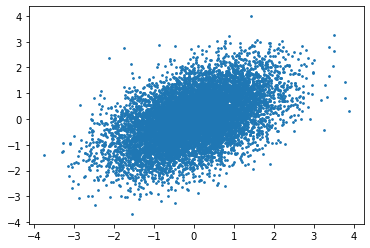

In [9]:
plt.scatter(automatic_samples[:,0], automatic_samples[:,1], s=3)

Gibbs Sampling

In [14]:
samples = {'x': [1], 'y': [-1]}

num_samples = 1000

for i in range(num_samples):
    curr_y = samples['y'][-1]
    new_x = np.random.normal(curr_y/2, np.sqrt(3/4))
    new_y = np.random.normal(new_x/2, np.sqrt(3/4))
    samples['x'].append(new_x)
    samples['y'].append(new_y)

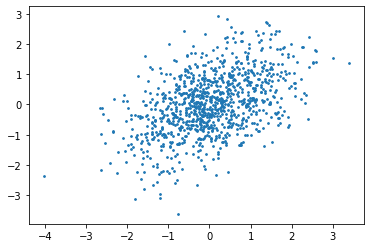

In [15]:
plt.scatter(samples['x'], samples['y'], s=3)

To show that the sampled distribution is normal

(array([0.00270172, 0.        , 0.        , 0.01621029, 0.01891201,
        0.05133259, 0.11347205, 0.18912008, 0.2620664 , 0.33501272,
        0.44578306, 0.35932816, 0.28638184, 0.25125954, 0.18371665,
        0.09996347, 0.05133259, 0.03242059, 0.00270172, 0.00270172]),
 array([-4.01571144, -3.645946  , -3.27618057, -2.90641514, -2.53664971,
        -2.16688428, -1.79711884, -1.42735341, -1.05758798, -0.68782255,
        -0.31805712,  0.05170832,  0.42147375,  0.79123918,  1.16100461,
         1.53077005,  1.90053548,  2.27030091,  2.64006634,  3.00983177,
         3.37959721]),
 <BarContainer object of 20 artists>)

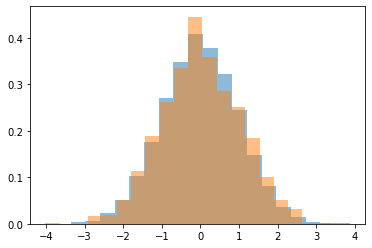

In [16]:
plt.hist(automatic_samples[:,0], bins=20, density=True, alpha=0.5)
plt.hist(samples['x'], bins=20, density=True, alpha=0.5)

(array([0.00305718, 0.00611437, 0.01222874, 0.01834311, 0.05197214,
        0.04891496, 0.09782992, 0.19871702, 0.29654693, 0.363805  ,
        0.38826248, 0.41271996, 0.32100441, 0.29043256, 0.22928886,
        0.1406305 , 0.08254399, 0.04280059, 0.0397434 , 0.01528592]),
 array([-3.61794567, -3.29117413, -2.96440259, -2.63763105, -2.31085951,
        -1.98408797, -1.65731643, -1.33054489, -1.00377335, -0.67700182,
        -0.35023028, -0.02345874,  0.3033128 ,  0.63008434,  0.95685588,
         1.28362742,  1.61039896,  1.9371705 ,  2.26394203,  2.59071357,
         2.91748511]),
 <BarContainer object of 20 artists>)

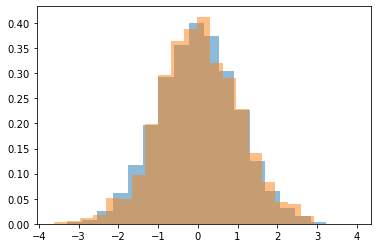

In [17]:
plt.hist(automatic_samples[:,1], bins=20, density=True, alpha=0.5)
plt.hist(samples['y'], bins=20, density=True, alpha=0.5)

To show that Gibbs sampling and numpy sampling are different

0.002910511915979011


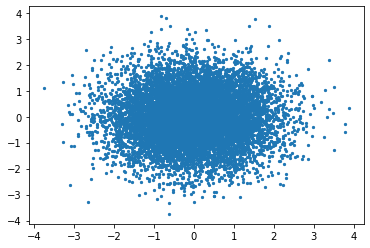

In [18]:
plt.scatter(automatic_samples[:-1,0], automatic_samples[1:,0], s=5)
print(pearsonr(automatic_samples[:-1,0], automatic_samples[1:,0])[0])

0.21490935578507625


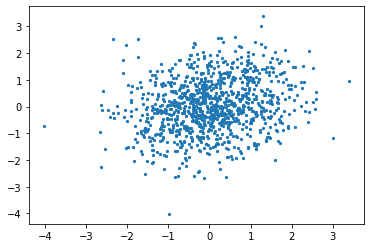

In [20]:
plt.scatter(samples['x'][:-1], samples['x'][1:], s=5)
print(pearsonr(samples['x'][:-1], samples['x'][1:])[0])

Gibbs sampling with different initial values

In [36]:
num_samples = 5000
def gibb(samples):
    
    for i in range(num_samples):
        curr_y = samples['y'][-1]
        new_x = np.random.normal(curr_y/2, np.sqrt(3/4))
        new_y = np.random.normal(new_x/2, np.sqrt(3/4))
        samples['x'].append(new_x)
        samples['y'].append(new_y)
    return samples

In [37]:
samples_init1 = {'x': [0], 'y': [-1]}
samples_init2 = {'x': [-1], 'y': [-1]}
samples_init3 = {'x': [-1], 'y': [0]}
samples_init1 = gibb(samples_init1)
samples_init2 = gibb(samples_init2)
samples_init3 = gibb(samples_init3)

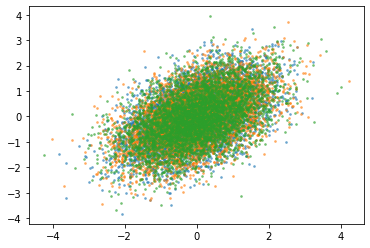

In [39]:
plt.scatter(samples_init1['x'], samples_init1['y'], s=3,alpha=0.5)
plt.scatter(samples_init2['x'], samples_init2['y'], s=3,alpha=0.5)
plt.scatter(samples_init3['x'], samples_init3['y'], s=3,alpha=0.5)